In [293]:
%pylab inline 
# 그림을 그리기 위한 환경 자동 구축 명령어 (magic command)

Populating the interactive namespace from numpy and matplotlib


# 혐오 표현 분류하기 : 다중 분류 문제

한국어 혐오표현(Korean HateSpeech) 데이터셋을 사용해 혐오 표현인지 아닌지 분류를 해보겠습니다.

데이터셋 : https://github.com/kocohub/korean-hate-speech

# 데이터 불러오기

In [3]:
import pandas as pd

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/kocohub/korean-hate-speech/master/labeled/train.tsv", sep="\t")

In [9]:
df

,comments,contain_gender_bias,bias,hate
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False,none,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",False,none,none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True,gender,hate
...,...,...,...,...
7891,힘내세요~ 응원합니다!!,False,none,none
7892,힘내세요~~삼가 고인의 명복을 빕니다..,False,none,none
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,False,none,none
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,False,none,none


In [12]:
df['hate'].unique()

array(['hate', 'none', 'offensive'], dtype=object)

In [13]:
df['bias'].unique()

array(['others', 'none', 'gender'], dtype=object)

In [14]:
df['contain_gender_bias'].unique()

array([False,  True])

hate 컬럼에는 'hate', 'none', 'offensive'가 있네요.   
각각이 무엇을 의미하는지 출력해 볼까요?

In [15]:
df[df['hate'] == 'hate']

,comments,contain_gender_bias,bias,hate
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True,gender,hate
6,"100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제, 여성의 정치참여 금지, ...",True,gender,hate
19,180이하 호빗 한남들은 결혼 하지마셈 ㅋ 돈없으면 연애도 하지마셈 ㅋ 니들 호빗 ...,True,gender,hate
...,...,...,...,...
7864,흑발미녀???장난똥때리냐?????마녀란 말도 아깝다!!!,False,others,hate
7879,히잌! 기저귀 찬 년들이 군대 군대 주댕이 털고 자빠졌노ㅋ( ° ͜ʖ͡°)╭∩╮,True,gender,hate
7880,히트곡이 없는데 추억팔이가되는 놀라운 조선식 방송국연예매니징ㅋㅋ 기획사 소속사 걍 ...,False,others,hate
7881,"히트작이래봐야 미사, 발리 두개 정도가 다고 연기력도 그저 그런 수준으로 배우로서 ...",False,none,hate


In [16]:
df[df['hate'] == 'offensive']

,comments,contain_gender_bias,bias,hate
8,10년만에 재미를 느끼는 프로였는데왜 니들때문에 폐지를해야되냐,False,none,offensive
9,10년차방탄팬인데 우리방탄처럼 성공은못하겠지만 일단 방탄의 부하가되고싶다는거니 이름...,False,none,offensive
13,1400억 뜯기고 얼마나 억울 했을꼬 뒤질만큼 아플만 하지~~~~ㅋㅋㅋㅋ,False,none,offensive
15,15살차이면 어릴때사고쳤으면 딸벌인데 ㅋㅋ 능력좋네 전현무 여자들이 전현무스타일이 ...,False,others,offensive
23,1년연예 ㅋㅋ 2년봅니다....,False,none,offensive
...,...,...,...,...
7859,휴.. 연하남? 이종석이 결정했다면 보기야 하겠지만 스토리보니 여주위주 또 남주는 ...,True,gender,offensive
7862,흐아아아암 잘잤다,False,none,offensive
7872,흥국아 오래 살았다 아이가,False,none,offensive
7877,히든싱어도 끝났다...예전에 비해 가수의 레벨이 너무 떨어짐.,False,none,offensive


In [17]:
df[df['hate'] == 'none']

,comments,contain_gender_bias,bias,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False,none,none
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",False,none,none
5,10+8 진짜 이승기랑 비교된다,False,none,none
7,10년뒤 윤서인은 분명히 재평가될것임. 말하나하나가 틀린게없음,False,none,none
10,10살 차이가 넘을텐데 부부라고? 무슨 내용인지 긍금하네..,False,others,none
...,...,...,...,...
7891,힘내세요~ 응원합니다!!,False,none,none
7892,힘내세요~~삼가 고인의 명복을 빕니다..,False,none,none
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,False,none,none
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,False,none,none


단어들은 저 자체로 쓸 수 없기 때문에 숫자로 바꾸어 주어야 합니다.

먼저 데이터셋을 입력변수 X와 목표변수 y로 분리해 보죠.

## X 값 준비하기

In [48]:
X = df['comments']

한국어 문장을 숫자로 바꾸기 위해서, 무엇을 숫자로 바꿀 것인지 결정해야 합니다.   
만약 띄어쓰기를 기준으로 덩어리마다 숫자로 바꾼다면 다음과 같이 각각의 문장을 리스트로 변형합니다.

In [54]:
X[0].split()

['(현재',
 '호텔주인',
 '심정)',
 '아18',
 '난',
 '마른하늘에',
 '날벼락맞고',
 '호텔망하게생겼는데',
 '누군',
 '계속',
 '추모받네....']

In [58]:
newX = []
for sentence in X:
    newX.append(
        sentence.split()
    )

In [59]:
newX

[['(현재',
  '호텔주인',
  '심정)',
  '아18',
  '난',
  '마른하늘에',
  '날벼락맞고',
  '호텔망하게생겼는데',
  '누군',
  '계속',
  '추모받네....'],
 ['....한국적인',
  '미인의',
  '대표적인',
  '분...너무나',
  '곱고아름다운모습...그모습뒤의',
  '슬픔을',
  '미처',
  '알지못했네요ㅠ'],
 ['...못된',
  '넘들...남의',
  '고통을',
  '즐겼던',
  '넘들..이젠',
  '마땅한',
  '처벌을',
  '받아야지..,그래야,',
  '공정한',
  '사회지...심은대로',
  '거두거라...'],
 ['1,2화', '어설펐는데', '3,4화', '지나서부터는', '갈수록', '너무', '재밌던데'],
 ['1.',
  '사람',
  '얼굴',
  '손톱으로',
  '긁은것은',
  '인격살해이고2.',
  '동영상이',
  '몰카냐?',
  '메걸리안들',
  '생각이',
  '없노'],
 ['10+8', '진짜', '이승기랑', '비교된다'],
 ['100년안에',
  '남녀간',
  '성전쟁',
  '한번',
  '크게',
  '치룬',
  '후',
  '일부다처제,',
  '여성의',
  '정치참여',
  '금지,',
  '여성',
  '투표권',
  '삭제가',
  '세계의',
  '공통문화로',
  '자리잡을듯.',
  '암탉이',
  '너무',
  '울어댐.'],
 ['10년뒤', '윤서인은', '분명히', '재평가될것임.', '말하나하나가', '틀린게없음'],
 ['10년만에', '재미를', '느끼는', '프로였는데왜', '니들때문에', '폐지를해야되냐'],
 ['10년차방탄팬인데', '우리방탄처럼', '성공은못하겠지만', '일단', '방탄의', '부하가되고싶다는거니', '이름기억은해둠ㅇㅇ'],
 ['10살', '차이가', '넘을텐데', '부부라고?', '무슨', '내용인지', '긍금하네..'],
 ['12월이나', '1월이더', '결혼성수기지'

위에서 만든 덩어리들을 숫자로 변환하기 위해서 라이브러리 `gensim`을 사용하겠습니다.

In [47]:
!pip install gensim

     |████████████████████████████████| 23.9 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 7.6 MB/s  eta 0:00:01


In [49]:
from gensim.corpora import Dictionary

/home/khkim/anaconda3/envs/tf1/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [61]:
dictionary = Dictionary(newX)

변수 dictionary에 각각의 단어에 숫자로된 id 값이 들어가 있음을 확인할 수 있습니다.

In [62]:
dictionary.token2id

{'(현재': 0,
 '계속': 1,
 '난': 2,
 '날벼락맞고': 3,
 '누군': 4,
 '마른하늘에': 5,
 '심정)': 6,
 '아18': 7,
 '추모받네....': 8,
 '호텔망하게생겼는데': 9,
 '호텔주인': 10,
 '....한국적인': 11,
 '곱고아름다운모습...그모습뒤의': 12,
 '대표적인': 13,
 '미인의': 14,
 '미처': 15,
 '분...너무나': 16,
 '슬픔을': 17,
 '알지못했네요ㅠ': 18,
 '...못된': 19,
 '거두거라...': 20,
 '고통을': 21,
 '공정한': 22,
 '넘들...남의': 23,
 '넘들..이젠': 24,
 '마땅한': 25,
 '받아야지..,그래야,': 26,
 '사회지...심은대로': 27,
 '즐겼던': 28,
 '처벌을': 29,
 '1,2화': 30,
 '3,4화': 31,
 '갈수록': 32,
 '너무': 33,
 '어설펐는데': 34,
 '재밌던데': 35,
 '지나서부터는': 36,
 '1.': 37,
 '긁은것은': 38,
 '동영상이': 39,
 '메걸리안들': 40,
 '몰카냐?': 41,
 '사람': 42,
 '생각이': 43,
 '손톱으로': 44,
 '얼굴': 45,
 '없노': 46,
 '인격살해이고2.': 47,
 '10+8': 48,
 '비교된다': 49,
 '이승기랑': 50,
 '진짜': 51,
 '100년안에': 52,
 '공통문화로': 53,
 '금지,': 54,
 '남녀간': 55,
 '삭제가': 56,
 '성전쟁': 57,
 '세계의': 58,
 '암탉이': 59,
 '여성': 60,
 '여성의': 61,
 '울어댐.': 62,
 '일부다처제,': 63,
 '자리잡을듯.': 64,
 '정치참여': 65,
 '치룬': 66,
 '크게': 67,
 '투표권': 68,
 '한번': 69,
 '후': 70,
 '10년뒤': 71,
 '말하나하나가': 72,
 '분명히': 73,
 '윤서인은': 74,
 '재평가될것임.': 75,


In [63]:
len(dictionary)

39804

변수 dictionary는 각 덩어리(term) 마다 고유한 숫자 id를 지정한 역할을 합니다.   
그럼 우리가 사용할 데이터 안에 저 덩어리들이 몇 개 들어 있는지 개수를 세어 보겠습니다.

In [69]:
X[0]

'(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네....'

In [71]:
newX[0]

['(현재',
 '호텔주인',
 '심정)',
 '아18',
 '난',
 '마른하늘에',
 '날벼락맞고',
 '호텔망하게생겼는데',
 '누군',
 '계속',
 '추모받네....']

In [135]:
newX[0]

['(현재',
 '호텔주인',
 '심정)',
 '아18',
 '난',
 '마른하늘에',
 '날벼락맞고',
 '호텔망하게생겼는데',
 '누군',
 '계속',
 '추모받네....']

In [183]:
print(newX[0])
print(sorted(newX[0]))
dictionary.doc2bow(newX[0])

['(현재', '호텔주인', '심정)', '아18', '난', '마른하늘에', '날벼락맞고', '호텔망하게생겼는데', '누군', '계속', '추모받네....']
['(현재', '계속', '난', '날벼락맞고', '누군', '마른하늘에', '심정)', '아18', '추모받네....', '호텔망하게생겼는데', '호텔주인']


[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [184]:
print(newX[220])
print(sorted(newX[220]))
dictionary.doc2bow(newX[220])

['ㅋㅋㅋ', '2018년도', '재미지네~~결국', '진흙탕속으로~', 'ㅋㅋㅋ']
['2018년도', 'ㅋㅋㅋ', 'ㅋㅋㅋ', '재미지네~~결국', '진흙탕속으로~']


[(458, 2), (1674, 1), (1675, 1), (1676, 1)]

In [185]:
dictionary[458]

'ㅋㅋㅋ'

In [186]:
dictionary[1674]

'2018년도'

In [187]:
dictionary[1675]

'재미지네~~결국'

In [177]:
dictionary.doc2bow(["2018년도","(현재", "계속"])

[(0, 1), (1, 1), (1674, 1)]

In [181]:
dictionary[0]

'(현재'

In [182]:
dictionary[10]

'호텔주인'

In [180]:
dictionary[1676]

'진흙탕속으로~'

그럼 이제 덩어리들을 숫자로 바꾸어서 문장 대신 넣겠습니다.

In [194]:
dictionary.token2id['현재']

17482

이런 식으로 덩어리를 숫자 아이디로 바꾸어 줄거에요.

In [198]:
finalX = []
for sentence in newX:
    temp = []
    for term in sentence:
        temp.append(dictionary.token2id[term])
    finalX.append(temp)

In [200]:
finalX[:5]

[[0, 10, 6, 7, 2, 5, 3, 9, 4, 1, 8],
 [11, 14, 13, 16, 12, 17, 15, 18],
 [19, 23, 21, 28, 24, 25, 29, 26, 22, 27, 20],
 [30, 34, 31, 36, 32, 33, 35],
 [37, 42, 45, 44, 38, 47, 39, 41, 40, 43, 46]]

이제 X 값을 vectorize 합니다.

In [236]:
len(dictionary)

39804

In [237]:
def vectorize_sequences(sequences, dimension=39804):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [238]:
# X 데이터 벡터 변환
finalX = vectorize_sequences(finalX)

In [239]:
finalX

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

### 몇 개나 들어 있을까?

어떤 덩어리가 데이터에 몇 개나 들어 있는지 한 번 세어볼까요?   
기본 내장 라이브러리 collections 을 이용해 셀 수 있습니다.

In [93]:
from collections import Counter

In [115]:
count = Counter(sum(newX, []))

In [216]:
len(count)

39804

In [119]:
count.most_common(50)

[('너무', 326),
 ('진짜', 322),
 ('왜', 313),
 ('다', 268),
 ('좀', 232),
 ('더', 197),
 ('ㅋㅋ', 192),
 ('그냥', 192),
 ('잘', 157),
 ('ㅋㅋㅋ', 147),
 ('이', 139),
 ('정말', 121),
 ('근데', 121),
 ('이제', 119),
 ('또', 114),
 ('난', 112),
 ('참', 106),
 ('많이', 102),
 ('ㅋ', 101),
 ('무슨', 100),
 ('그', 94),
 ('역시', 90),
 ('솔직히', 89),
 ('ㅠㅠ', 84),
 ('.', 84),
 ('저', 83),
 ('안', 82),
 ('뭐', 80),
 ('얼마나', 78),
 ('드라마', 77),
 ('보고', 76),
 ('연기', 76),
 ('사람', 75),
 ('이렇게', 75),
 ('여자', 72),
 ('이런', 72),
 ('아니고', 67),
 ('하고', 67),
 ('그래도', 67),
 ('남자', 66),
 ('넘', 66),
 ('요즘', 65),
 ('그렇게', 64),
 ('하는', 61),
 ('그만', 60),
 ('다시', 58),
 ('그리고', 56),
 ('ㅋㅋㅋㅋ', 56),
 ('누가', 56),
 ('연예인', 55)]

## y 값 준비하기

이제 레이블이 될 값을 살펴 보겠습니다.

In [126]:
df.head(3)

,comments,contain_gender_bias,bias,hate
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False,none,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate


우리는 hate 값을 사용할 겁니다.

In [124]:
y = df['hate']

- `hate`는 1
- `offensive`는 2
- `none`은 0

으로 바꿔보겠습니다

In [127]:
y.replace('hate', 1)

0          1
1       none
2          1
3       none
4          1
        ... 
7891    none
7892    none
7893    none
7894    none
7895    none
Name: hate, Length: 7896, dtype: object

잘 바뀌는 군요. 이걸 y 값에 덮어 씌어 줍니다.

In [128]:
y = y.replace('hate', 1)

In [ ]:
이제 나머지 두 개도 값을 바꿔 주겠습니다.

In [129]:
y = y.replace('offensive', 2)
y = y.replace('none', 0)

In [130]:
y

0       1
1       0
2       1
3       0
4       1
       ..
7891    0
7892    0
7893    0
7894    0
7895    0
Name: hate, Length: 7896, dtype: int64

이제 Scikit-learn의 `train_test_split` 함수를 사용해서 데이터셋을 손쉽게 무작위로 나눠보겠습니다.

In [18]:
from sklearn.model_selection import train_test_split

이제 전체 데이터에서 훈련 데이터셋은 80%, 테스트 데이터셋은 20%로 만들겠습니다

In [255]:
X_train, X_test, y_train, y_test = train_test_split(finalX, y, test_size=0.2)

In [256]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [257]:
y_train

958     0
7573    2
4487    0
5684    2
4421    2
       ..
6659    2
3300    2
5854    0
3226    0
5887    1
Name: hate, Length: 6316, dtype: int64

2차 분할로 훈련 데이터셋과 검증 데이터셋을 만듭니다.

In [258]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

데이터가 몇 개씩 있는지 확인해 보겠습니다

In [259]:
len(X_train)

5052

In [260]:
len(X_val)

1264

In [261]:
len(X_test)

1580

# 원핫인코딩

y 값의 레이블 0, 1, 2를 원-핫 인코딩으로 바꾸겠습니다.

`원-핫 인코딩`이 범주형 데이터에 널리 사용되기 때문에 `범주형 인코딩`이라고도 부릅니다.   
이 경우 레이블의 원-핫 인코딩은 각 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터입니다

In [211]:
from keras.utils import np_utils

Using TensorFlow backend.


In [277]:
nb_classes = 3  # 클래스의 총 개수

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_val = np_utils.to_categorical(y_val, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [278]:
y_train

4121    2
2118    0
3361    1
5246    2
2627    1
       ..
7626    0
2668    2
3133    1
7297    0
6006    0
Name: hate, Length: 5052, dtype: int64

In [279]:
Y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# 모델 구성

In [220]:
from keras.models import Sequential  # Keras의 시퀀셜 모델
from keras.layers.core import Dense, Dropout, Activation # 모델에서 사용할 레이어 형태

아까 덩어리의 개수가 `39804`개인 것을 확인했습니다.   
그것을 입력 사이즈로 넣어줍니다.

In [297]:
model = Sequential()
model.add(Dense(768, input_shape=(39804,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

In [298]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 768)               30570240  
_________________________________________________________________
activation_12 (Activation)   (None, 768)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               196864    
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                16448     
_________________________________________________________________
activation_14 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                

In [299]:
model.compile(optimizer='adam',  # rmsprop
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [300]:
history = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size=100,
                    validation_data=(X_val, Y_val)
                   )

Train on 5052 samples, validate on 1264 samples
Epoch 1/10
5052/5052 [==============================] - 24s 5ms/step - loss: 1.0386 - accuracy: 0.4652 - val_loss: 1.0107 - val_accuracy: 0.4739
Epoch 2/10
5052/5052 [==============================] - 23s 5ms/step - loss: 0.3537 - accuracy: 0.8797 - val_loss: 1.3742 - val_accuracy: 0.4929
Epoch 3/10
5052/5052 [==============================] - 23s 5ms/step - loss: 0.0276 - accuracy: 0.9941 - val_loss: 1.7907 - val_accuracy: 0.4881
Epoch 4/10
5052/5052 [==============================] - 23s 5ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 2.1912 - val_accuracy: 0.4723
Epoch 5/10
5052/5052 [==============================] - 23s 5ms/step - loss: 3.3005e-04 - accuracy: 1.0000 - val_loss: 3.4170 - val_accuracy: 0.4873
Epoch 6/10
5052/5052 [==============================] - 16s 3ms/step - loss: 6.6963e-04 - accuracy: 0.9998 - val_loss: 2.7664 - val_accuracy: 0.4818
Epoch 7/10
5052/5052 [==============================] - 14s 3ms/step - los

손실과 정확도 곡선을 그려 보죠

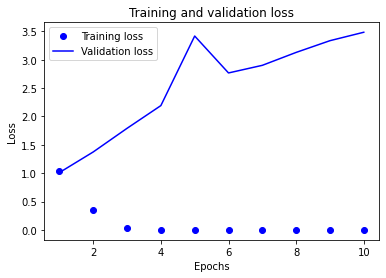

In [301]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

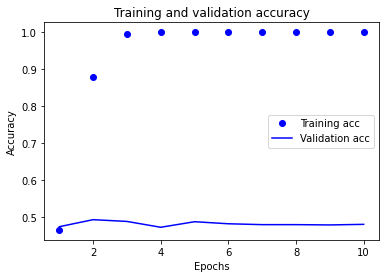

In [302]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

테스트 데이터셋에 대해 성능을 평가해 보겠습니다

In [304]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1580/1580 [==============================] - 1s 775us/step
Test score: 3.545864775210996
Test accuracy: 0.47151899337768555


47%네요.. 앞으로 어떻게 해야 할까요? 😭

# 척도(metric)를 더 추가해서 평가하는 방법

In [308]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model = Sequential()
model.add(Dense(768, input_shape=(39804,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

In [311]:
# fit the model
history = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size=100,
                    validation_data=(X_val, Y_val)
                   )

# evaluate the model
_loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test, Y_test, batch_size=100, verbose=1)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5052 samples, validate on 1264 samples
Epoch 1/10
5052/5052 [==============================] - 19s 4ms/step - loss: 0.6076 - acc: 0.6769 - f1_m: 0.1650 - precision_m: 0.4511 - recall_m: 0.1078 - val_loss: 0.5821 - val_acc: 0.6970 - val_f1_m: 0.3894 - val_precision_m: 0.5959 - val_recall_m: 0.2906
Epoch 2/10
5052/5052 [==============================] - 18s 4ms/step - loss: 0.1866 - acc: 0.9281 - f1_m: 0.8814 - precision_m: 0.9304 - recall_m: 0.8483 - val_loss: 1.0293 - val_acc: 0.6661 - val_f1_m: 0.4870 - val_precision_m: 0.5001 - val_recall_m: 0.4746
Epoch 3/10
5052/5052 [==============================] - 18s 4ms/step - loss: 0.0113 - acc: 0.9961 - f1_m: 0.9942 - precision_m: 0.9947 - recall_m: 0.9937 - val_loss: 1.1549 - val_acc: 0.6619 - val_f1_m: 0.4842 - val_precision_m: 0.4932 - val_recall_m: 0.4757
Epoch 4/10
5052/5052 [==============================] - 18s 4ms/step - loss: 0.00

# 분류 리포트를 생성하는 방법

라이브러리 Scikit-learn을 이용해 여러 척도들을 리포트 형태로 출력해 볼 수 있습니다.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [320]:
from sklearn.metrics import classification_report

In [319]:
Y_pred = model.predict(X_test, batch_size=64, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)

print(
    classification_report(np.argmax(Y_test, axis=1), Y_pred_bool, target_names=['none', 'hate', 'offensive'])
)

1580/1580 [==============================] - 1s 685us/step
              precision    recall  f1-score   support

        none       0.53      0.70      0.60       698
        hate       0.44      0.21      0.28       390
   offensive       0.35      0.33      0.34       492

    accuracy                           0.46      1580
   macro avg       0.44      0.41      0.41      1580
weighted avg       0.45      0.46      0.44      1580

